In [1]:
from MD_PLIP.md_tools.md_tools import load_traj, random_sampling, cluster_traj, analysis
from urllib import request
import os
import time

### Download Necessary File to Run Example
top_url = "https://gpcrmd.org/dynadb/files/Dynamics/10873_dyn_90.pdb"
traj_url = "https://gpcrmd.org/dynadb/files/Dynamics/10869_trj_90.xtc"

local_top = "../MD_dir/"+top_url.split("/")[-1]
local_traj = "../MD_dir/"+traj_url.split("/")[-1]

if not os.path.isdir("../MD_dir"):
    os.mkdir("../MD_dir")
    request.urlretrieve(top_url, local_top)
    request.urlretrieve(traj_url, local_traj)

start_time = time.time()

### Load in and cluster Trajectory

t, topology = load_traj(top=local_top,traj=local_traj, start=25, rmres="POPC")
cluster_traj(t, nsample=50, save_files=False, outdir="../MD_dir/clusters")
load_time = time.time()

print("Time spent loading and clustering: {:.0f} s\n".format(load_time-start_time))

### Perform Analysis

analyser = analysis(t, topology, "../MD_dir/clusters")
bsid = analyser.bsids[0]
analyser.analyse_bsid(bsid, save_files=False)
analysis_time = time.time()

print("Time spent Performing Analysis: {:.0f} s\n".format(analysis_time-load_time))
print("Total time spent: {:.0f} s\n".format(analysis_time-start_time))

Max pairwise rmsd: 0.792598 nm
Time spent loading and clustering: 114 s



2024-02-12 12:24:24,643 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024-02-12 12:24:25,277 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024-02-12 12:24:26,177 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024-02-12 12:24:27,079 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024-02-12 12:24:28,143 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024-02-12 12:24:29,084 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)
2024

Time spent Performing Analysis: 51 s

Total time spent: 165 s



### Generate Plots

Automatically generate plots of interactions present above a certain fraction of frames. Presence is determined by the rules as used in PLIP founded in literature evidence.

Plots of hydrophobic, pi-cation and saltbridge interaction display:
* Distance scatterplot
* Histogram of distances
* Eventplot of interaction presence

Hydrogen bonding plots display:
* Distance scatterplot
* D-H-A angle scatterplot
* Eventplot of interaction presence

Pi-stacking plots display:
* Distance scatterplot
* Planar angle of involved rings
* Centre of mass (COM) offset between the two rings (magnitude of the projection of the vector connecting each ring COM onto the plane defined by the other ring)
* Eventplot of interaction presences discerning between planar and T-shaped interactions

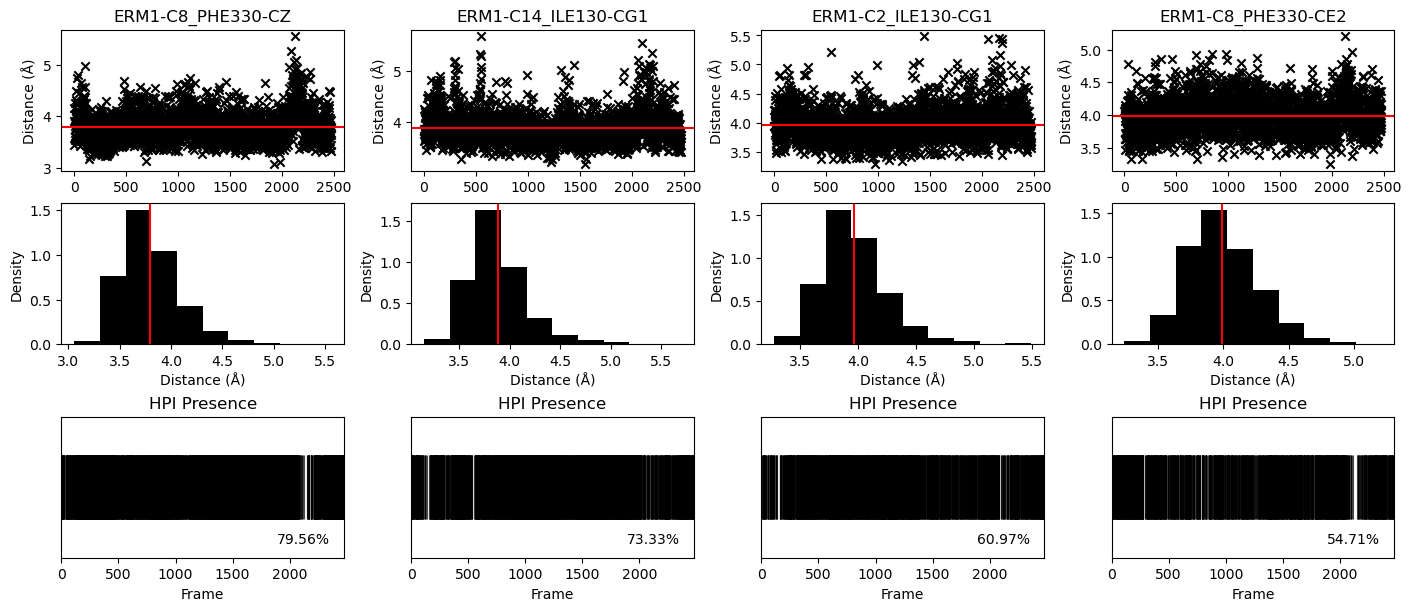

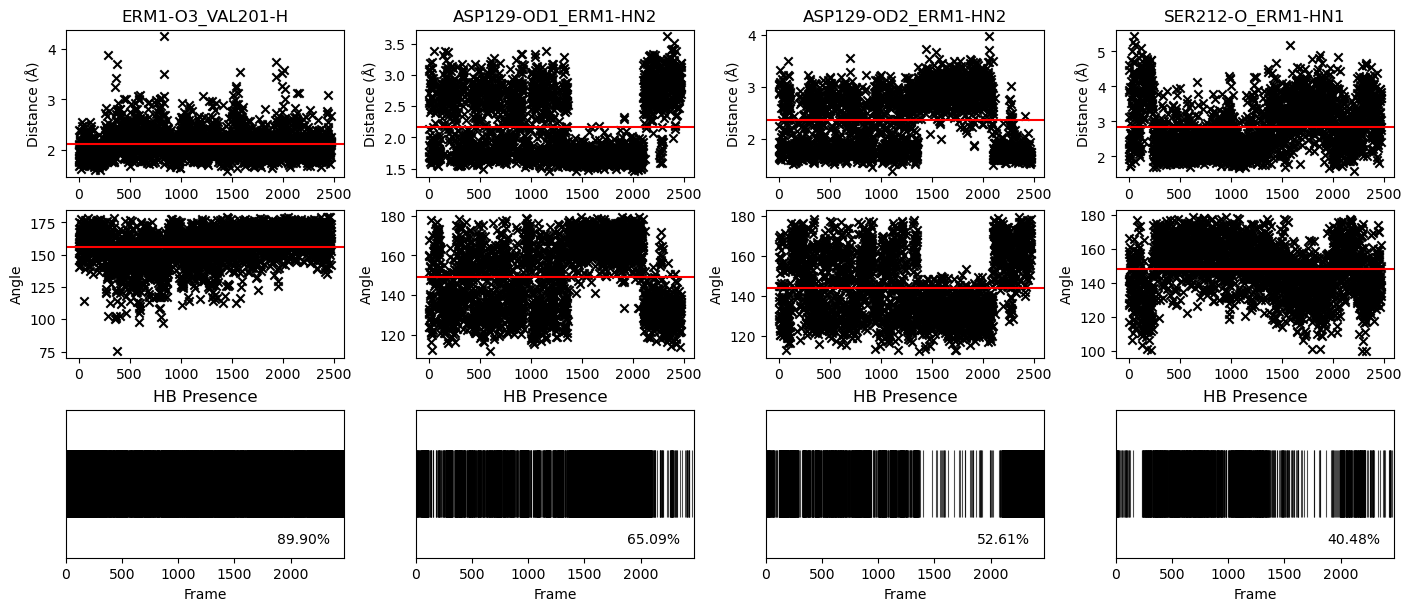

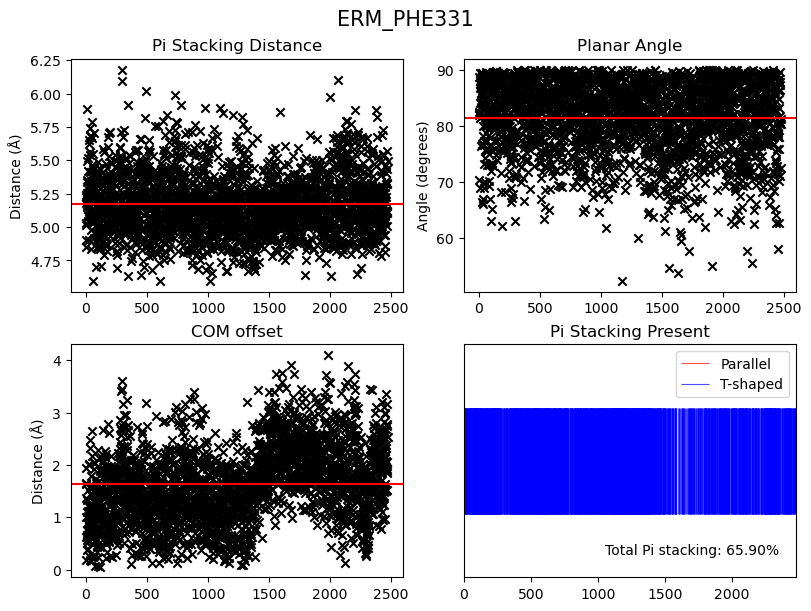

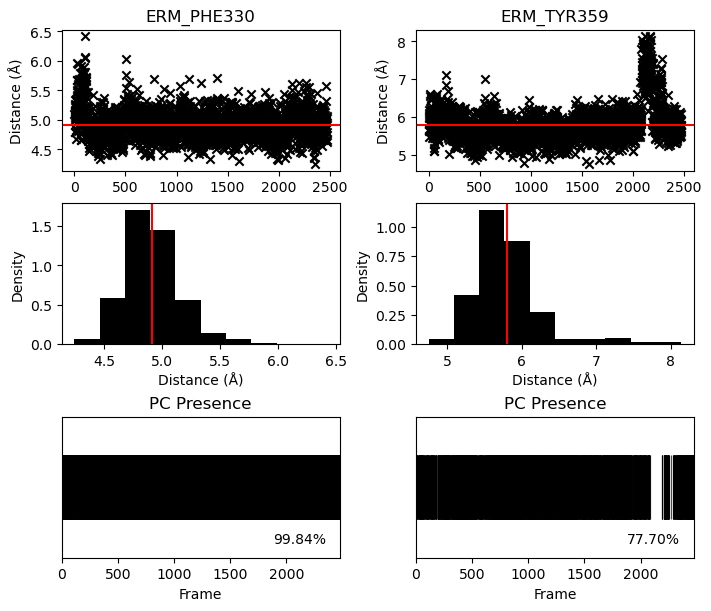

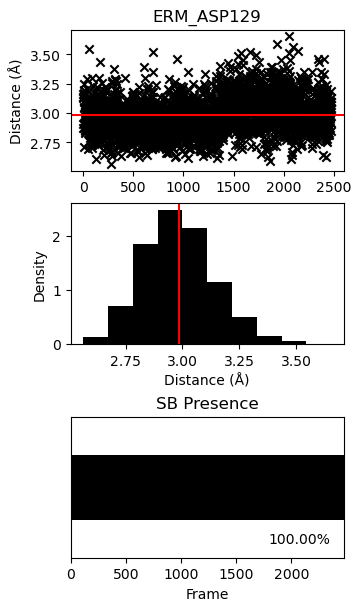

In [2]:
analyser.plot_HPI(plot_thresh=0.5,save_files=True)
analyser.plot_HB(plot_thresh=0.3,save_files=True)
analyser.plot_PS(plot_thresh=0.3,save_files=True)
analyser.plot_PC(plot_thresh=0.3,save_files=True)
analyser.plot_SB(plot_thresh=0.2,save_files=True)

## Plot interaction presence

Eventplot of interaction of any ligand atom with any residue atom. Separated by interaction type.

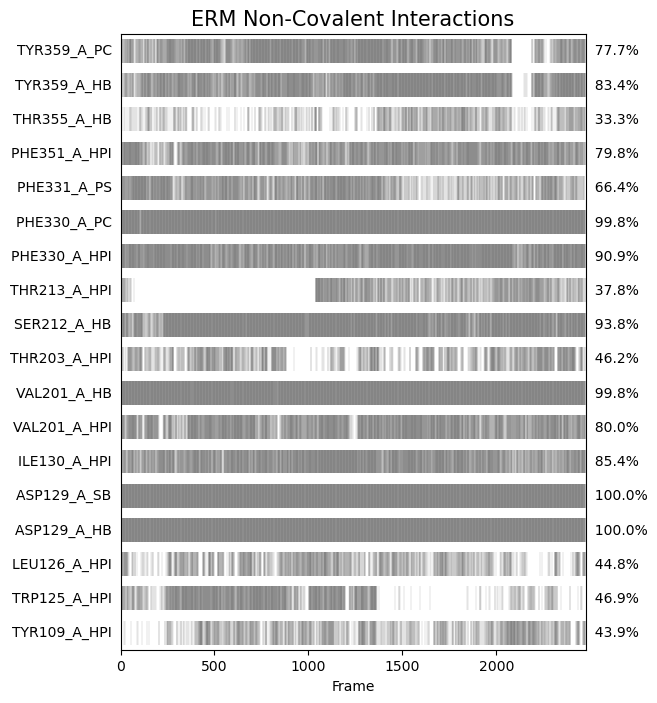

In [4]:
analyser.plot_interaction_presence(plot_thresh=0.3, save_files=True)

### Generate 2D Interaction Plot

Grabs molecule from topology, assigns correct atom  typing with openbabel then passes to RDkit for parsing of bonds etc.

Final plot drawn using Cairo

In [3]:
analyser.plot_2D_interactions(plot_thresh=0.3, save_png=True, out_name="Example_2d_plot.png")

## Interaction fingerprints and representative frames

The analyser class can output interaction fingerprints either as a matrix or as a representative fingerprint of the entire simulation.

By calculating the distance between each frame and the representative fingerprint we can define the most representative frame of a simulation by the argmin of these distances. The function "representative_frame" outputs the frame number and has the option to save a Pymol session of the most representative frame.

In [5]:
analyser.representative_frame(thresh=0.3, pymol=True, save_files=True, metric="tanimoto")

2024-02-12 12:25:56,559 [WARNING] [preparation.py:1418] plip.structure.preparation: no polar hydrogens will be assigned (make sure your structure contains hydrogens)


471

Interaction fingerprint matrix can be used to produce a distance matrix to compare bindig modes throughout the trajectory

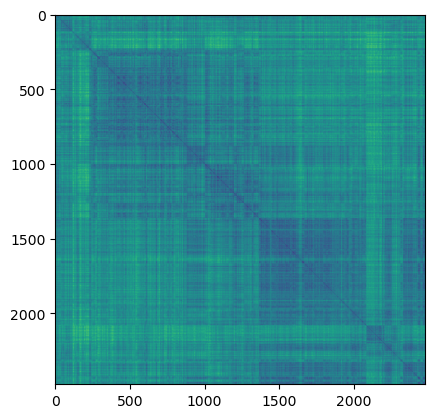

In [25]:
import numpy as np
from scipy.spatial.distance import rogerstanimoto
import matplotlib.pyplot as plt

ifp = analyser.get_ifp_matrix(save_files=False)

ifp = ifp.iloc[:,np.where(ifp.sum() != 0)[0]]

dist_ar = np.zeros(tuple([ifp.shape[0]]*2))
for i in range(ifp.shape[0]):
    for j in range(ifp.shape[0]):
        dist_ar[i,j] = rogerstanimoto(ifp.iloc[i], ifp.iloc[j])

plt.imshow(dist_ar)